In [ ]:
# Import necessary packages
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

import statsmodels.formula.api as smf

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read in the data
df = pd.read_csv("train.csv")

# EDA

In [ ]:
# take a look at data
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# HomePlanet

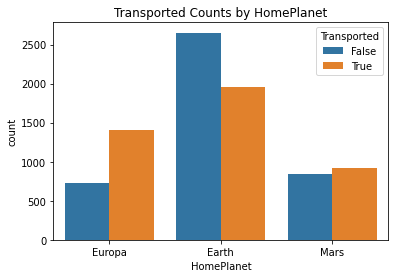

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot a bar chart
def plot_gg(column):
    # Use seaborn to create a bar chart
    sns.countplot(x=column, hue="Transported", data=df)
    plt.title("Transported Counts by {}".format(column))
    plt.show()

# Plot bar chart
plot_gg("HomePlanet")

# CryoSleep

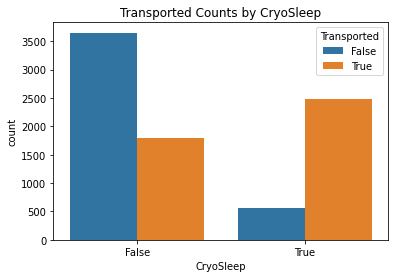

In [ ]:
# Plot bar chart
plot_gg("CryoSleep")

# Destination

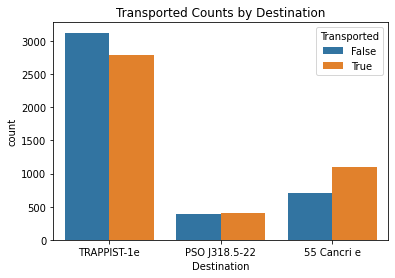

In [ ]:
# Plot bar chart
plot_gg("Destination")

# Amenities (Total Spent)

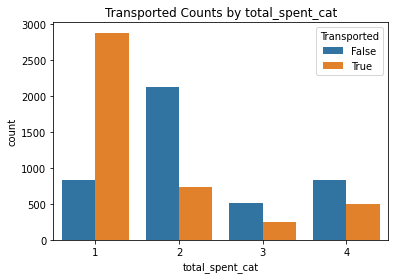

In [ ]:
# Calculate total spent and create a categorical variable for it
df["total_spent"] = df.iloc[:,8:12].sum(axis=1, skipna=True)
df["total_spent_cat"] = np.where(df["total_spent"] == 0, 1,
                                 np.where(df["total_spent"] < 1000, 2,
                                          np.where(df["total_spent"] < 2000, 3, 4)))

# Plot bar chart
plot_gg("total_spent_cat")

# Remove columns
df = df.drop(columns=["total_spent", "total_spent_cat"])

# VIP

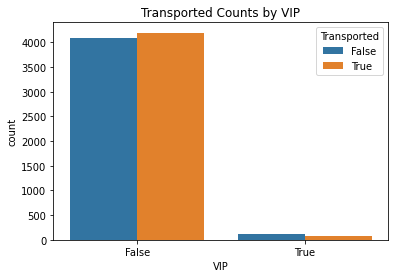

In [ ]:
# Plot bar chart
plot_gg("VIP")

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Feature Engineering

In [ ]:
# Split up Cabin and PassengerId columns
df2 = df.assign(deck=df["Cabin"].str[0],
                num=df["Cabin"].str[2:-2].astype(float),
                side=df["Cabin"].str[-1],
                id1=df["PassengerId"].str[:4],
                id2=df["PassengerId"].str[5:7])

# Calculate group sizes
group_size = df2[["id1", "id2"]].groupby("id1").id2.max()

# Add feature to df2
df2 = pd.merge(df2, group_size.reset_index(name="size"), on="id1", how="left")
df2["size"] = df2["size"].where(df2["size"].astype(int) < 4, 4)

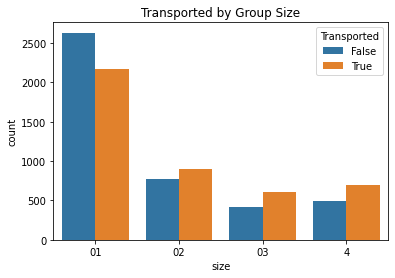

In [ ]:
# Create bar chart
sns.countplot(x="size", hue="Transported", data=df2)
plt.title("Transported by Group Size")
plt.show()

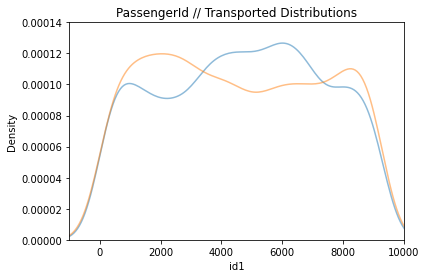

In [ ]:
# Create density plot
sns.kdeplot(df2[df2["Transported"] == 1]["id1"].astype(float), label="TRUE", alpha=0.5)
sns.kdeplot(df2[df2["Transported"] == 0]["id1"].astype(float), label="FALSE", alpha=0.5)
plt.xlim(-1000, 10000)
plt.ylim(0, 0.00014)
plt.title("PassengerId // Transported Distributions")
plt.show()

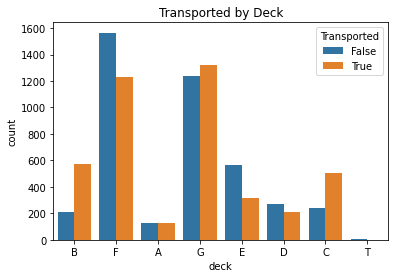

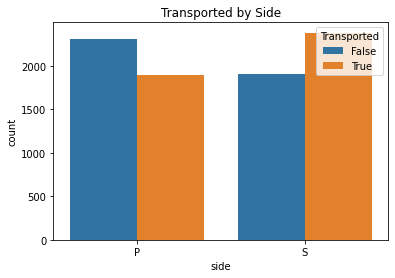

In [ ]:
# Create bar charts
sns.countplot(x="deck", hue="Transported", data=df2)
plt.title("Transported by Deck")
plt.show()
sns.countplot(x="side", hue="Transported", data=df2)
plt.title("Transported by Side")
plt.show()

# Missing Values

In [ ]:
# Remove unwanted features
df3 = df2.drop(columns=["Name", "Cabin"])

In [ ]:
# Function to check proportion of missing values
def na_prop(vec):
    return vec.isnull().sum() / len(vec)

# Check proportions of missing values
pd.DataFrame({"na_prop": df3.apply(na_prop)})

,na_prop
PassengerId,0.000000
HomePlanet,0.023122
CryoSleep,0.024963
Destination,0.020936
Age,0.020591
VIP,0.023352
RoomService,0.020821
FoodCourt,0.021051
ShoppingMall,0.023927
Spa,0.021051


In [ ]:
# Check proportion of rows missing data
1 - (df2.dropna().shape[0] / df2.shape[0])

0.24007822385827682

# CryoSleep = TRUE



In [ ]:
# If CryoSleep is True, set money spent to 0
cryosleep_mask = df3["CryoSleep"] == True
df3.loc[cryosleep_mask, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0

# Check proportions of missing values
pd.DataFrame({"na_prop": df3[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].apply(na_prop)})

,na_prop
RoomService,0.012999
FoodCourt,0.012999
ShoppingMall,0.012884
Spa,0.013574
VRDeck,0.014494


# Imputation based on group

In [ ]:
# see how many we can fix with home planet
df3_missing_hp = df3[["HomePlanet", "id1"]].loc[df3["id1"].isin(df3["id1"][df3["HomePlanet"].isna()]) & (~df3["HomePlanet"].isna().any())].drop_duplicates()

# merge
df3 = df3.merge(df3_missing_hp, on="id1", how="left", suffixes=("", "_hp"))

# Fill in missing values for HomePlanet
df3["HomePlanet"] = df3["HomePlanet"].where(~df3["HomePlanet"].isna(), df3["HomePlanet_hp"].where(~df3["HomePlanet_hp"].isna(), np.nan))

# Remove the HomePlanet_hp column
df3 = df3.drop(columns=["HomePlanet_hp"])

# same process for destination
df3_missing_dest = df3[["Destination", "id1"]].loc[df3["id1"].isin(df3["id1"][df3["Destination"].isna()]) & (~df3["Destination"].isna().any())].drop_duplicates()

# merge
df3 = df3.merge(df3_missing_dest, on="id1", how="left", suffixes=("", "_dest"))

# Fill in missing values for Destination
df3["Destination"] = df3["Destination"].where(~df3["Destination"].isna(), df3["Destination_dest"].where(~df3["Destination_dest"].isna(), np.nan))

# Remove the Destination_dest column
df3 = df3.drop(columns=["Destination_dest"])

# same process for deck
df3_missing_deck = df3[["deck", "id1"]].loc[df3["id1"].isin(df3["id1"][df3["deck"].isna()]) & (~df3["deck"].isna().any())].drop_duplicates()

# merge
df3 = df3.merge(df3_missing_deck, on="id1", how="left", suffixes=("", "_deck"))

# Fill in missing values for deck
df3["deck"] = df3["deck"].where(~df3["deck"].isna(), df3["deck_deck"].where(~df3["deck_deck"].isna(), np.nan))

# Remove the deck_deck column
df3 = df3.drop(columns=["deck_deck"])

# check props
df3.loc[:, ["HomePlanet", "Destination", "deck"]].apply(na_prop)

HomePlanet     0.023122
Destination    0.020936
deck           0.022892
dtype: float64

# Lazy Imputation

In [ ]:
# lazy fill in
df3["HomePlanet"] = df3["HomePlanet"].fillna("Mars") # distribution match
df3["deck"] = df3["deck"].fillna(df3["deck"].mode())
df3["side"] = df3["side"].fillna(df3["side"].mode())
df3["num"] = df3["num"].fillna(df3["num"].median())
df3["CryoSleep"] = df3["CryoSleep"].fillna(df3["CryoSleep"].mode())
df3["Destination"] = df3["Destination"].fillna(df3["Destination"].mode())
df3["VIP"] = df3["VIP"].fillna(df3["VIP"].mode())


# remove unneccesary data
# df3.drop(columns=["df3_missing_deck", "df3_missing_dest", "df3_missing_hp"], inplace=True)

In [ ]:
df3

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,id1,id2,size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,0001,01,01
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,0002,01,01
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,0003,01,02
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,0003,02,02
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,0004,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P,9276,01,01
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S,9278,01,01
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S,9279,01,01
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S,9280,01,02


## Linear Model to predict age

In [ ]:
# fix df3 feature types
df3["id1"] = df3["id1"].astype(float)
df3["id2"] = df3["id2"].astype(float)
df3["side"] = df3["side"].astype("category")
df3["HomePlanet"] = df3["HomePlanet"].astype("category")
df3["Destination"] = df3["Destination"].astype("category")
df3["deck"] = df3["deck"].astype("category")

# create data frame without missing values
age_df = df3.dropna(subset=["Age"])
na_age_df = df3[df3["Age"].isna()]

# test // train
np.random.seed(1867)
trn_idx_age = np.random.choice(age_df.index, int(0.8 * len(age_df)), replace=False)
train_age = age_df.loc[trn_idx_age].drop(columns=["PassengerId"])
test_age = age_df.drop(trn_idx_age).drop(columns=["PassengerId"])

In [ ]:
# linear fit
age_lm1 = LinearRegression()
age_fit_train = train_age.dropna()
age_lm1.fit(age_fit_train.drop(columns=["Age", "HomePlanet", "Destination", "CryoSleep", "VIP", "deck", "side"]), age_fit_train["Age"])

# check model
print(age_lm1.coef_)

# rmse function
age_fit_test = test_age.dropna()
preds = age_lm1.predict(age_fit_test.drop(columns=["Age", "HomePlanet", "Destination", "CryoSleep", "VIP", "deck", "side"]))
np.sqrt(np.mean((preds - age_fit_test["Age"]) ** 2))

[ 1.25325471e-03  7.79916696e-04  4.97235767e-04  9.16269760e-04
  4.01946652e-04 -1.09401663e+00 -6.32522791e-03  7.44928537e-04
 -1.87728571e-02 -2.70784837e+00]


13.437835859651113

In [ ]:
# fit model
age_lm2 = smf.ols(formula='Age ~ VIP + size + HomePlanet + Destination + deck', data=age_fit_train).fit()

# check model
age_lm2.summary()

# calculate rmse
rmse = np.sqrt(np.mean((age_fit_train['Age'] - age_lm2.predict()) ** 2))

# calculate rmse for median guess
median_guess_rmse = np.sqrt(np.mean((age_fit_train['Age'] - np.median(age_fit_train['Age'])) ** 2))
print(median_guess_rmse)

14.736922899700742


In [ ]:
# fit model on entire dataset
age_lm2 = smf.ols(formula='Age ~ VIP + size + HomePlanet + Destination + deck', data=age_df).fit()

# input new age predictions
df3.loc[df3['Age'].isna(), 'Age'] = age_lm2.predict(na_age_df)

# Modeling

In [ ]:
cat1 = pd.get_dummies(df3['HomePlanet'], drop_first = True)
cat2 = pd.get_dummies(df3['Destination'], drop_first = True)
cat3 = pd.get_dummies(df3['deck'], drop_first = True)
cat4 = pd.get_dummies(df3['side'], drop_first = True)

df3.drop(['HomePlanet', 'Destination', 'deck', 'side'], axis=1, inplace=True)

df3 = pd.concat([df3, cat1, cat2, cat3, cat4], axis=1)

df3 = df3.dropna()

# split data into train and test sets
train, test = train_test_split(df3, test_size=0.2, random_state=42)

# drop passenger ID column from train and test sets
train = train.drop(columns=['PassengerId'])
test = test.drop(columns=['PassengerId'])

# function to test model accuracy
def test_acc(model, test):
  preds = model.predict(test.drop(columns=['Transported']))
  actual = test['Transported']
  return (preds == actual).mean()

# 5-fold cross-validation
kf = KFold(n_splits=5)

## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# create feature and target dataframes
X = train.drop(columns=['Transported', 'VIP'])
y = train['Transported']

# initialize logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs')

# perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  logistic_regression.fit(X_train, y_train)
  print(logistic_regression.score(X_test, y_test))

# check test accuracy
X_test = test.drop(columns=['Transported', 'VIP'])
y_test = test['Transported']
print(logistic_regression.score(X_test, y_test))

0.7774193548387097
0.7901533494753834
0.7788539144471348
0.7990314769975787
0.7812752219531881
0.7914783731439639


# KNN

In [ ]:
# define grid of k values
knn_tune = {'n_neighbors': list(range(2, 40, 2))}

# define model
knn1_cv1 = KNeighborsClassifier()

# define grid search
grid_search = GridSearchCV(estimator=knn1_cv1, param_grid=knn_tune, cv=kf)

# fit model to data
X = train.drop(columns=['Transported', 'VIP'])
y = train['Transported']
grid_search.fit(X, y)

# evaluate model on test data
X_test = test.drop(columns=['Transported', 'VIP'])
y_test = test['Transported']
print(grid_search.score(X_test, y_test))

0.775338928340865


# Random Forest

In [ ]:
# define model
rf2_cv1 = RandomForestClassifier()

# fit model to data
X = train.drop(columns=['Transported', 'VIP'])
y = train['Transported']
scores = cross_val_score(rf2_cv1, X, y, cv=kf)
print(scores)

# evaluate model on test data
X_test = test.drop(columns=['Transported', 'VIP'])
y_test = test['Transported']
rf2_cv1.fit(X, y)
print(rf2_cv1.score(X_test, y_test))

[0.78790323 0.78531073 0.77723971 0.79983858 0.79661017]
0.8218205293737896


# GBM

In [ ]:
# define model
gbm1_cv1 = GradientBoostingClassifier(n_estimators=500, max_depth=4, learning_rate=0.1, min_samples_leaf=10)

# fit model to data
X = train.drop(columns=['Transported'])
y = train['Transported']
scores = cross_val_score(gbm1_cv1, X, y, cv=kf)
print(scores)

# evaluate model on test data
X_test = test.drop(columns=['Transported'])
y_test = test['Transported']
gbm1_cv1.fit(X, y)
print(gbm1_cv1.score(X_test, y_test))

[0.78790323 0.78531073 0.79015335 0.80387409 0.81194512]
0.8076178179470627
